In [381]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [382]:
def plot_data(x,y):
    plt.xlabel("Population of city in 10,000s")
    plt.ylabel("Profit in $10,000")
    plt.scatter(x=x, y=y, color="red")
        
    plt.show()

In [383]:
def plot_3d(inp=None,pred=None, draw_line=False):
    fig = plt.figure(figsize=(6,6))
    ax = Axes3D(fig,auto_add_to_figure=False)
    fig.add_axes(ax)
    X = data2[:,:2].copy()
    X = np.concatenate([np.ones((47, 1)), X], axis=1)

    ax.set_xlabel("Size of House (square feet)")
    ax.set_ylabel("number of bedrooms")
    ax.set_zlabel("house prices")
    ax.scatter(data2[:,0], data2[:,1], data2[:,2], c="r", marker="o")
    if draw_line:
        ax.plot(inp[:,0] , inp[:,1], pred)
    plt.show()

In [384]:
class NormalLinearRegression:
    def __init__(self) -> None:
        self.X = None
        self.Y = None
        self.theta = None

    def fit(self,x,y):
        """
        Returns the optimal weights.
        parameters: 
            x : input/feature matrix
            y : target matrix
        
        Returns:
            theta : Array of optimal value of weights.

        """
        self.X = x
        
        if self.X.ndim == 1: # adding extra dimension, if X is a 1-D array
            self.X = self.X.reshape(-1,1)
            
        # adding extra column of 1s for the bias term
        self.X = np.concatenate([np.ones((self.X.shape[0], 1)), self.X], axis=1)
        
        self.Y = y
        self.theta = np.zeros((self.X.shape[1],1))

        self.theta = self.calculate_theta()
        self.theta = self.theta.reshape(-1,1)

        return self.theta

    def predict(self, x):
        """
        Returns the predicted target.
        parameters: 
            x : test input/feature matrix
        
        Returns:
            y :  predicted target value.

        """
        x = np.array(x) # converting list to numpy array
        if x.ndim == 1:
            x = x.reshape(1,-1)
        x = np.concatenate([np.ones((x.shape[0],1)), x], axis=1)
        return np.dot(x,self.theta)

    def calculate_theta(self):
        """
        Calculate the optimal weights.
        parameters: None
        Returns:
            theta_temp : Array containing calculated value of weights

        """
        y_projection = np.dot(self.X.T, self.Y)
        cov = np.dot(self.X.T, self.X)
        cov_inv = np.linalg.pinv(cov)
        theta_temp = np.dot(cov_inv, y_projection)

        return theta_temp

In [385]:
data = np.loadtxt("./data/data1.txt", delimiter=",")
data[:5] # top 5 enteries

array([[ 6.1101, 17.592 ],
       [ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233]])

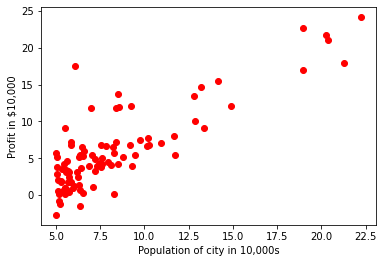

In [386]:
X = data[:,0]
Y = data[:,1]

plot_data(X,Y)

In [387]:
model = NormalLinearRegression()
params = model.fit(X,Y)
params # matrix containing optimal weights

array([[-3.89578088],
       [ 1.19303364]])

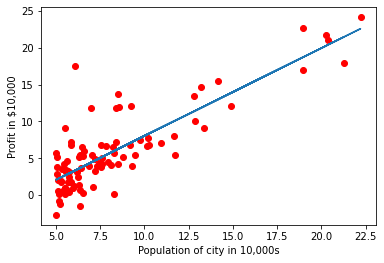

In [388]:
pred1 = model.predict(X.reshape(-1,1)) # storing predictions for X

plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000")
plt.scatter(x=X, y=Y, color="red")
plt.plot(X, pred1)
plt.show()
        

In [389]:
model.predict([7.5])*10000

array([[50519.7145311]])

In [390]:
data2 = np.loadtxt("./data/data2.txt", delimiter=",")
X2 = data2[:,:2]
Y2 = data2[:,2]

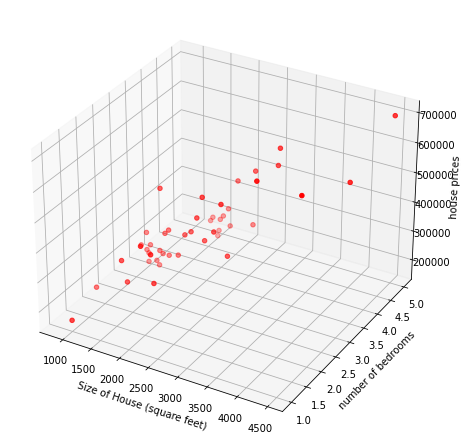

In [391]:
plot_3d()

In [392]:
model2 = NormalLinearRegression()
params2 = model2.fit(X2,Y2)
params2

array([[89597.90954355],
       [  139.21067402],
       [-8738.01911255]])

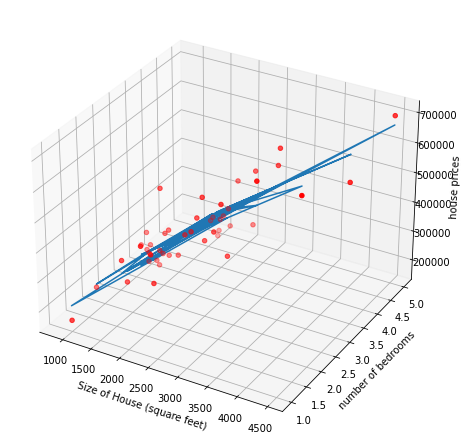

In [393]:
pred = model2.predict(X2).reshape(-1)
plot_3d(data2, pred, draw_line=True)

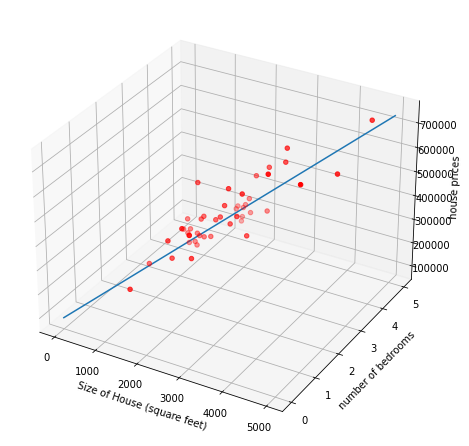

In [394]:
inp = np.concatenate([np.linspace(0,5000,5000).reshape(-1,1),np.linspace(0,5,5000).reshape(-1,1)], axis=1)

pred = model2.predict(inp)
plot_3d(inp,pred.reshape(-1),draw_line=True)

In [395]:
model2.predict([1640,3])

array([[291689.3575948]])